## Continuous Target Variables With Regression Analysis

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                  header=None,
                  sep='\s+')

In [2]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


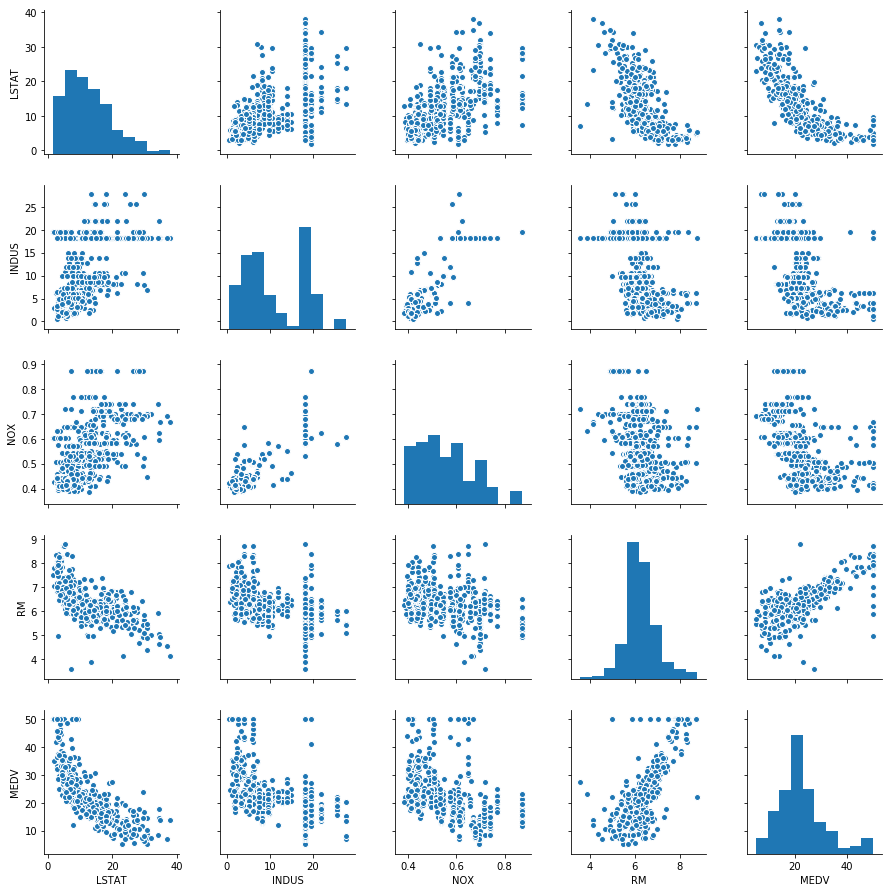

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()

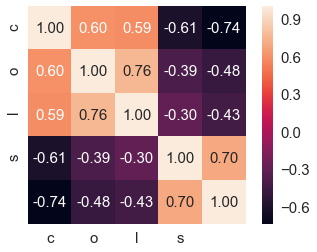

In [7]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, annot=True, square=True, cbar=True,
                 fmt='.2f', annot_kws={'size': 15}, 
                 yticklabels='cols', 
                 xticklabels='cols')

In [8]:
class LinearRegressionGD(object):
    
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X,y):
        self.w = np.zeros(1+X.shape[1])
        self.cost = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w[1:] += self.eta * X.T.dot(errors)
            self.w[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost.append(cost)
            
        return self
    
    def net_input(self,X):
        return np.dot(X, self.w[1:]) + self.w[0]
    
    def predict(self, X):
        return self.net_input(X)

In [10]:
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(x_std,y_std)

Text(0.5,0,'Epoch')

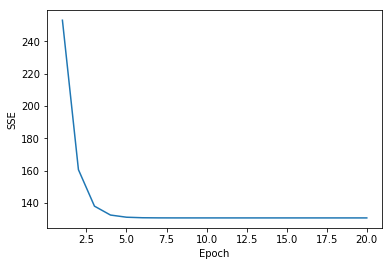

In [11]:
sns.reset_orig()
plt.plot(range(1, lr.n_iter+1), lr.cost)
plt.ylabel('SSE')
plt.xlabel('Epoch')

In [12]:
def lin_regplot(X,y,model):
    plt.scatter(X,y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

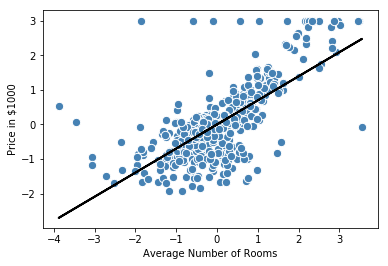

In [13]:
lin_regplot(x_std,y_std,lr)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Price in $1000')
plt.show()

In [16]:
num_room_std = sc_x.transform([[5.0]])
price_std = lr.predict(num_room_std)
print('Price in $1000: ',sc_y.inverse_transform(price_std))

('Price in $1000: ', array([10.83993289]))


In [17]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X,y)
print("Slope: ",slr.coef_[0])

('Slope: ', 9.10210898118031)


In [18]:
print('Intercept: ', slr.intercept_)

('Intercept: ', -34.67062077643857)


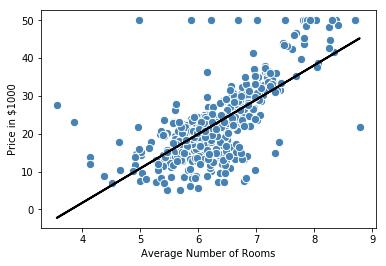

In [19]:
lin_regplot(X,y,slr)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Price in $1000')
plt.show()